<a href="https://colab.research.google.com/github/aswit3/Start_Your_NLP_Career/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Twitter-Sentiment-Analysis**

https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [0]:
train  = pd.read_csv("drive/My Drive/datasets/Twitter-Sentiment-Analysis/train_E6oV3lV.csv")
test = pd.read_csv("drive/My Drive/datasets/Twitter-Sentiment-Analysis/test_tweets_anuFYb8.csv")

In [7]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [8]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

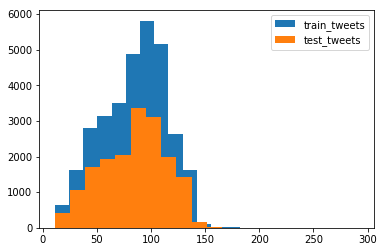

In [9]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()


In [10]:
combi = train.append(test, ignore_index=True)
combi.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [12]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [0]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [0]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [17]:
tokenized_tweet.head(10)

0                                                      [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                          [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                [factsguide, society, #motivation]
5                                   [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                        [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about, that, #school, #exams, 

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

In [20]:
combi['tidy_tweet'].head(10)

0                                                      when father dysfunct selfish drag kid into dysfunct #run
1                                        thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                                                           bihday your majesti
3                                                                                    #model love take with time
4                                                                                      factsguid societi #motiv
5                                    huge fare talk befor they leav chao disput when they there #allshowandnogo
6                                                                                           camp tomorrow danni
7    next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8                                                   love land #allin #cav #champion #cleveland #clevelan

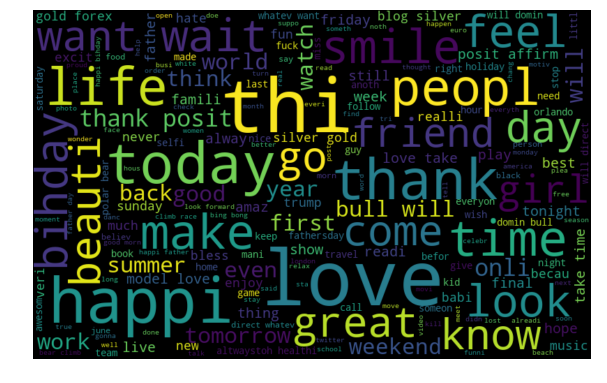

In [21]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

all_words

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

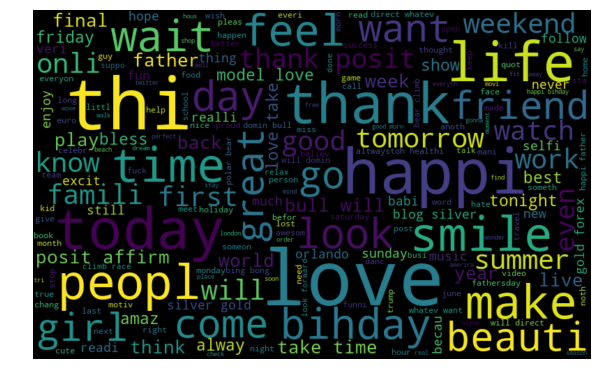

In [22]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

normal_words

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


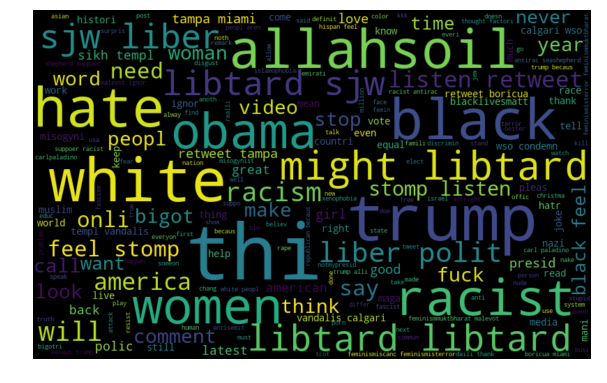

In [23]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

negative_words

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

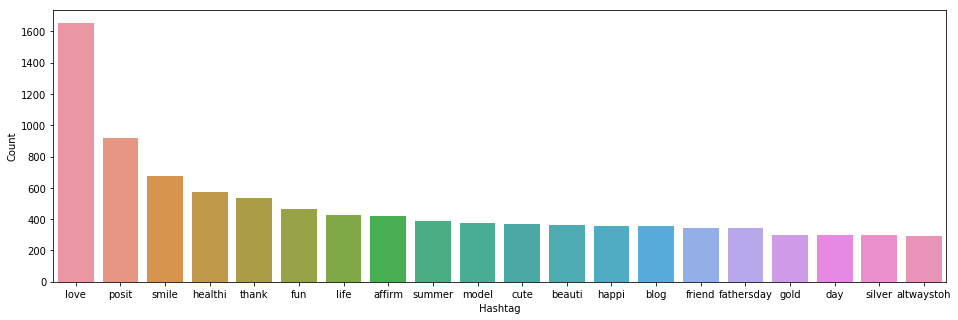

In [26]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


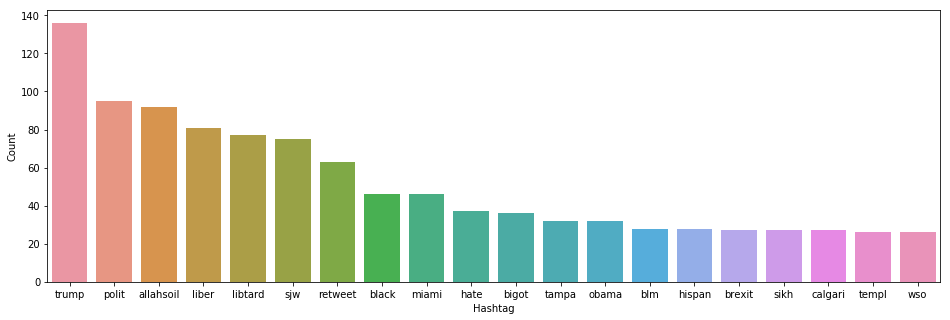

In [27]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [0]:
import gensim

In [0]:
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [0]:
# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
# bow.shape 

(49159, 1000)

In [0]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
# tfidf.shape

(49159, 1000)

In [29]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [30]:
model_w2v.wv.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('#avocado', 0.5592329502105713),
 ('spaghetti', 0.5541477799415588),
 ('noodl', 0.5505881905555725),
 ('cookout', 0.548174262046814),
 ('melani', 0.5439785122871399),
 ('spinach', 0.5416958928108215),
 ('#biall', 0.5405570268630981),
 ('#cellar', 0.539299726486206),
 ('fav', 0.5346745848655701),
 ('#bihdaydinn', 0.5339345932006836)]

In [31]:
model_w2v.wv.most_similar(positive="trump")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('donald', 0.540753960609436),
 ('phoni', 0.5374510288238525),
 ('#delegaterevolt', 0.53568035364151),
 ('melo', 0.5331525802612305),
 ('unstabl', 0.5282918810844421),
 ('unfit', 0.5256986618041992),
 ('hillari', 0.5256495475769043),
 ('jibe', 0.516210675239563),
 ('tomlin', 0.514593243598938),
 ('endors', 0.5108312368392944)]

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec


In [33]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [0]:
# from gensim.models import FastText

In [0]:
# print("Training a Gensim FastText model")
# model = FastText(sentences=tokenized_tweet, size = 200, window = 2) # workers = workers, 
# print("Training complete")

Training a Gensim FastText model
Training complete


In [0]:
# model.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('winner', 0.9924277663230896),
 ('inner', 0.9884334802627563),
 ('runner', 0.9880768656730652),
 ('overload', 0.9878299236297607),
 ('banner', 0.986736536026001),
 ('bathroom', 0.986585259437561),
 ('funer', 0.9849284291267395),
 ('overcom', 0.9847040176391602),
 ('chocol', 0.984054684638977),
 ('parad', 0.9838610887527466)]

In [0]:
# def word_vector(tokens, size):
#     vec = np.zeros(size).reshape((1, size))
#     count = 0.
#     for word in tokens:
#         try:
#             vec += model[word].reshape((1, size))
#             count += 1.
#         except KeyError: # handling the case where the token is not in vocabulary
                         
#             continue
#     if count != 0:
#         vec /= count
#     return vec

In [0]:
# fasttext_arrays = np.zeros((len(tokenized_tweet), 200))

# for i in range(len(tokenized_tweet)):
#     fasttext_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
# fasttext_df = pd.DataFrame(fasttext_arrays)
# fasttext_df.shape

(49159, 200)

In [34]:
from sklearn.model_selection import train_test_split


train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

_, _, ytrain, yvalid = train_test_split(train_w2v, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)



print(train_w2v.shape, train['label'].shape)

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

(31962, 200) (31962,)


In [35]:
import tensorflow as tf
import keras.layers as layers
from keras.models import Model
from keras.datasets import imdb
from gensim.models import Word2Vec
from gensim.models import FastText
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input,Embedding,Dense,Flatten
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import f1_score

epochs = 25
batch_size = 1024
loss = "binary_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

from keras import models

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(200,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=loss,optimizer=optimizer,metrics= metrics)
model.fit(xtrain_w2v,ytrain,epochs=epochs,batch_size=batch_size,callbacks=callbacks,validation_data=(xvalid_w2v,yvalid))


predictions = model.predict(xvalid_w2v)
predictions = [0 if i<0.5 else 1 for i in predictions]

f1_score(yvalid, predictions)
# print("Accuracy: ",accuracy_score(ytrain,predictions))
# print("Classification Report: ",classification_report(ytrain,predictions))


Using TensorFlow backend.
W0719 19:52:23.945273 139886152386432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 19:52:23.985650 139886152386432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 19:52:23.993028 139886152386432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 19:52:24.042099 139886152386432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 19:52:24.067210 13988615

Train on 22373 samples, validate on 9589 samples
Epoch 1/25
22373/22373 [==============================] - 2s 92us/step - loss: 0.2702 - acc: 0.9054 - val_loss: 0.1772 - val_acc: 0.9287
Epoch 2/25
22373/22373 [==============================] - 1s 52us/step - loss: 0.1480 - acc: 0.9406 - val_loss: 0.1413 - val_acc: 0.9457
Epoch 3/25
22373/22373 [==============================] - 1s 53us/step - loss: 0.1287 - acc: 0.9512 - val_loss: 0.1372 - val_acc: 0.9497
Epoch 4/25
22373/22373 [==============================] - 1s 52us/step - loss: 0.1199 - acc: 0.9563 - val_loss: 0.1303 - val_acc: 0.9523
Epoch 5/25
22373/22373 [==============================] - 1s 53us/step - loss: 0.1125 - acc: 0.9598 - val_loss: 0.1281 - val_acc: 0.9531
Epoch 6/25
22373/22373 [==============================] - 1s 52us/step - loss: 0.1055 - acc: 0.9619 - val_loss: 0.1251 - val_acc: 0.9551
Epoch 7/25
22373/22373 [==============================] - 1s 53us/step - loss: 0.0989 - acc: 0.9647 - val_loss: 0.1233 - val_acc:

0.6817120622568094

In [0]:
test_pred = model.predict(test_w2v)
test_pred = [0 if i<0.5 else 1 for i in test_pred]

test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('model_result.csv', index=False)
